# Intro to Data Science 
## Part VII. - Regression and Embedding pipelines

### Table of contents

- #### Regression
    - <a href="#What-is-Regression?">Theory</a>
    - <a href="#Linear-regression">Linear regression</a>
    - <a href="#Ridge-regression">Ridge regression</a>
    - <a href="#Bayesian-Ridge-regression">Bayesian regression</a>
    - <a href="#Support-Vector-regression">Support Vector regression</a>
    - <a href="#XGBoost">XGBoost</a>

- #### Embedding pipelines
    - <a href="#Embedding-pipelines">Reusing trained pipelines</a>
        - <a href="#Exporting-pipelines">Exporting pipelines</a>
        - <a href="#Loading-pipelines">Loading pipelines</a>

---

## What is Regression?
Regression - just as classification - is a supervised machine learning problem however in case of regression the target variable is continuous. It is also _"a statistical process for estimating the relationships among variables. It includes many techniques for modeling and analyzing several variables, when the focus is on the relationship between a __dependent variable__ and one or more __independent variable__s (or 'predictors')."_ from: <a href="https://en.wikipedia.org/wiki/Regression_analysis">Wiki</a>

It is important to note that instead of the descriptive nature of statistical regression analysis Data Science focuses on the predictive side of this method.

## Why is it important?
_"Regression analysis is widely used for prediction and forecasting, where its use has substantial overlap with the field of machine learning."_ from: <a href="https://en.wikipedia.org/wiki/Regression_analysis">Wiki</a>

It is used to forecast any continuous variable:
- stock market
- salary prediction
- network traffic
- traffic
- etc.

## Tools
- Linear regression
- Ridge regression
- LASSO
- Bayesian regression
- Support Vector regression
- etc.

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import numpy as np
import pandas as pd

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

In [3]:
def plot_pred(y, predicted):
    fig, ax = plt.subplots()
    ax.scatter(y, predicted, edgecolors='k')
    ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
    ax.set_xlabel('Measured')
    ax.set_ylabel('Predicted')
    plt.show()

def show_score(model, X, y, cv=10, metric=None):
    scores = cross_val_score(model, X, y, cv=cv, scoring=metric)
    return "Accuracy: {:.2f} (+/- {:.2f})".format(scores.mean(), scores.std() * 2)

In [4]:
from sklearn.datasets import load_boston
X, y = load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42) 

## Linear regression

In [3]:
from sklearn.linear_model import LinearRegression

In [9]:
reg = LinearRegression(normalize=True)
reg.fit(X_train, y_train)
y_hat = reg.predict(X_test)

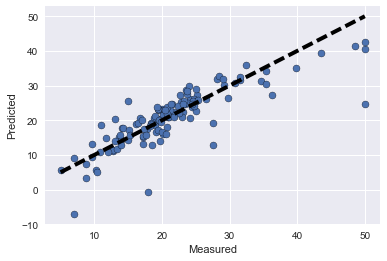

In [23]:
plot_pred(y_test, y_hat)

## Ridge regression

In [24]:
from sklearn.linear_model import Ridge

In [25]:
reg = Ridge(alpha=.5)
reg.fit(X_train, y_train)
y_hat = reg.predict(X_test)

In [26]:
show_score(reg, X, y)

'Accuracy: 0.24 (+/- 1.08)'

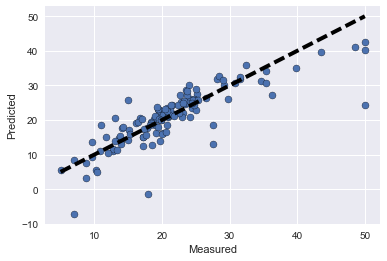

In [27]:
plot_pred(y_test, y_hat)

## Bayesian Ridge regression

In [28]:
from sklearn.linear_model import BayesianRidge

In [29]:
reg = BayesianRidge()
reg.fit(X_train, y_train)
y_hat = reg.predict(X_test)

In [30]:
show_score(reg, X, y)

'Accuracy: 0.26 (+/- 1.00)'

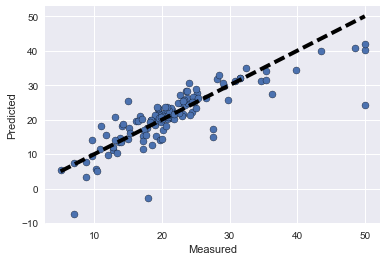

In [31]:
plot_pred(y_test, y_hat)

## Support Vector regression

In [32]:
from sklearn.svm import SVR

In [33]:
reg = SVR(kernel='rbf', gamma=5e-5, C=1e3)
reg.fit(X_train, y_train)
y_hat = reg.predict(X_test)

In [34]:
show_score(reg, X, y)

'Accuracy: -0.44 (+/- 3.27)'

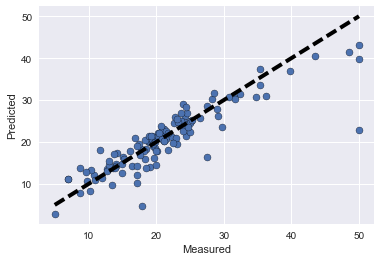

In [35]:
plot_pred(y_test, y_hat)

## XGBoost


To install, please follow the instructions found [here](http://www.picnet.com.au/blogs/guido/post/2016/09/22/xgboost-windows-x64-binaries-for-download/).

In [1]:
from xgboost.sklearn import XGBRegressor

In [5]:
reg = XGBRegressor()
reg.fit(X_train, y_train)
y_hat = reg.predict(X_test)

In [6]:
show_score(reg, X, y)

'Accuracy: 0.48 (+/- 0.77)'

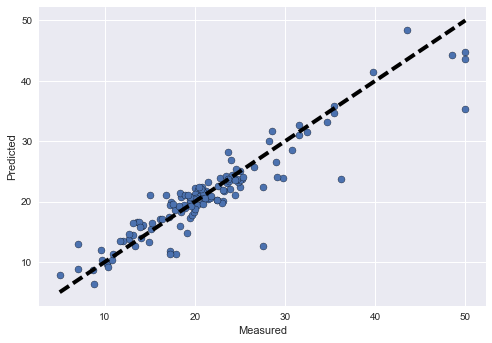

In [7]:
plot_pred(y_test, y_hat)

---

## Embedding pipelines

Trained pipelines can be used outside of the training program as well.

### Saving pipelines

First, we have to `serialize` the models. This process will save the whole pipeline object into a file. After saving, we can freely move the file and read it in elsewhere.  
**Important** to know that the used libraries must be the same versions in the saving and the loading end.

In [8]:
import pickle

with open('xgboost_model.pickle', 'wb') as picklefile:
    pickle.dump(reg, picklefile)

### Loading pipelines

Loading and using the models is pretty easy - as long as we have the same libraries installed (and the same versions).

In [11]:
import pickle

with open('xgboost_model.pickle', 'rb') as picklefile:
    model = pickle.load(picklefile)

In [12]:
show_score(model, X, y)

'Accuracy: 0.48 (+/- 0.77)'